# Princial Component Analysis (PCA)

## In class

Try to understand the notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Wine dataset

In [ ]:
import pandas as pd

# Wine
# Wine data
# 178 samples with 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# Features measure chemical composition e.g. alcohol content

# Wine data
# 178 samples with 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# Features measure chemical composition e.g. alcohol content
# https://archive.ics.uci.edu/ml/datasets/Wine
url = 'https://raw.githubusercontent.com/wichadak/wine/master/wine.data'
df = pd.read_csv(url, header=None)
df.sample(frac=1).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
90,2,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
14,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
109,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:

import numpy as np
X = df[df.columns[1:]].to_numpy(dtype=np.float32)
y = df[df.columns[0]].to_numpy()
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (178, 13) float32
y: (178,) int64


## PCA to de-correlate features

In [ ]:
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
X_pca = model.fit_transform(X)
print('X_pca:', X_pca.shape)

# describe
pd.DataFrame(X_pca).describe()

X_pca: (178, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,0.000000,0.000003,-1.285853e-07,2.357397e-07,2.678860e-07,-2.484643e-07,8.572354e-07,3.482519e-07,1.242322e-07,-1.242322e-07,-1.247344e-08,-6.697151e-09,-5.692578e-09
std,314.963104,13.135269,3.072152e+00,2.234093e+00,1.108533e+00,9.170941e-01,5.281796e-01,3.890775e-01,3.348086e-01,2.677734e-01,1.938450e-01,1.451631e-01,9.057434e-02
min,-469.059296,-27.504026,-9.005075e+00,-5.999351e+00,-3.319481e+00,-1.954749e+00,-1.568975e+00,-1.269572e+00,-7.940771e-01,-8.818138e-01,-5.020868e-01,-3.933636e-01,-2.643943e-01
25%,-246.139977,-8.330378,-1.852034e+00,-1.339166e+00,-6.417685e-01,-6.234646e-01,-3.426479e-01,-2.776329e-01,-2.497484e-01,-1.682080e-01,-1.229378e-01,-8.343323e-02,-5.130639e-02
50%,-73.525394,-3.269235,1.496602e-02,3.110406e-01,8.229639e-02,-9.193971e-02,-4.381787e-03,3.975998e-02,-1.786348e-03,-5.527498e-03,-5.216143e-03,-2.235730e-02,-1.028140e-03
75%,238.565544,5.449198,2.152860e+00,1.481671e+00,6.736645e-01,5.145356e-01,3.724663e-01,2.548769e-01,2.033302e-01,1.423484e-01,1.249637e-01,8.778018e-02,4.887855e-02
max,933.118286,58.793758,9.947130e+00,6.461738e+00,3.811527e+00,3.596516e+00,1.843119e+00,1.403566e+00,8.592651e-01,9.470227e-01,5.406679e-01,6.242122e-01,3.286479e-01


### Visualizing the correlation (before and after)

In [ ]:
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
import matplotlib.pyplot as plt
def heatmap(x, y, size, ax=None):
    if ax is None:
      fig, ax = plt.subplots()

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}

    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )

    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    return ax

def correlation_map(X, ax=None):
  df = pd.DataFrame(X)
  corr = df.corr()
  corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
  corr.columns = ['x', 'y', 'value']
  heatmap(
      x=corr['x'],
      y=corr['y'],
      size=corr['value'].abs(),
      ax=ax,
  )

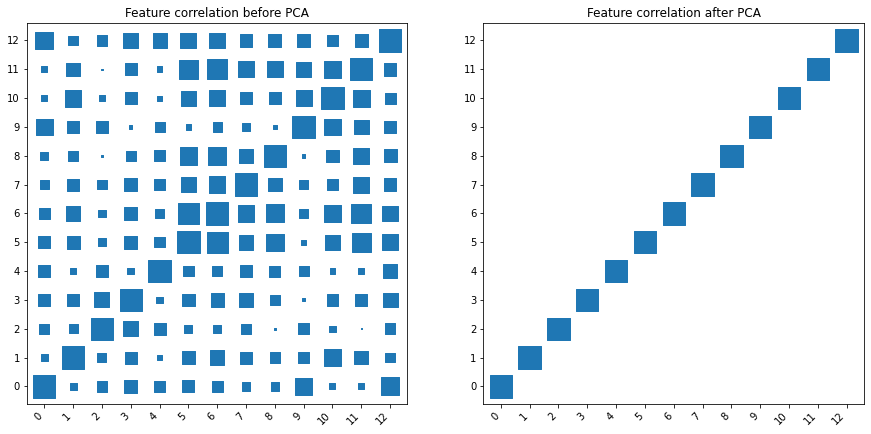

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))
ax[0].set_title('Feature correlation before PCA')
ax[1].set_title('Feature correlation after PCA')
correlation_map(X, ax[0])
correlation_map(X_pca, ax[1])

## PCA to reduce dimension of the data

In [ ]:
# reduce to 2 dimensions
model = PCA(n_components=2)
# Fit model to points
X_pca = model.fit_transform(X)
print('X_pca:', X_pca.shape)

X_pca: (178, 2)


### 2D scatter plot (not very good)

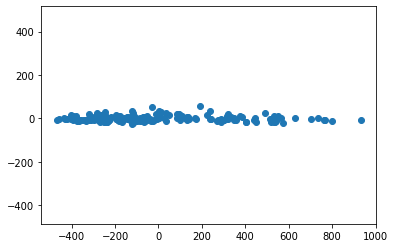

In [ ]:
plt.axis("equal")
plt.scatter(X_pca[:,0], X_pca[:,1])

## Selecting the number of components?

### Explained variances = How good are the principal components

The first component explained ~100% of variance because the dataset has one feature (number 13) that "dominates" the variance.

This is unrealistic.

A better picture could be obtained by standardizing the feature first.

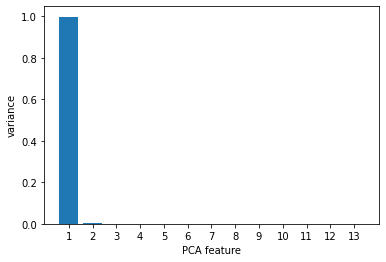

In [ ]:
model = PCA()
X_pca = model.fit_transform(X)
cols = list(df.columns[1:])
plt.bar(cols, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(cols)
plt.show()

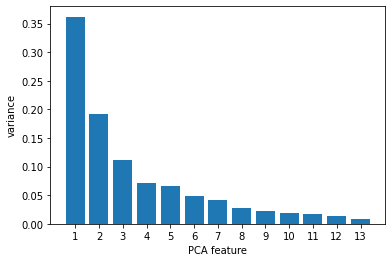

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
_X = scaler.fit_transform(X)
model = PCA()
X_pca = model.fit_transform(_X)

cols = list(df.columns[1:])
plt.bar(cols, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(cols)
plt.show()

In [ ]:
print('each explain the variance of the dataset by:', model.explained_variance_ratio_)

each explain the variance of the dataset by: [0.36198848 0.19207492 0.11123632 0.07069027 0.06563288 0.04935824
 0.04238679 0.0268075  0.02222151 0.0193002  0.01736836 0.01298231
 0.00795215]


In [ ]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(model.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_pca,
    labels=labels,
    dimensions=range(4),
    color=df[0]
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Eigenfaces

If we treat images as vectors, a dataset of persons could reveal the "principal" faces.


In [ ]:
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print('dataset:', data.images.shape)

dataset: (1288, 50, 37)


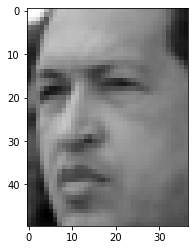

In [ ]:
# example
plt.imshow(data.images[0], cmap='gray')

In [ ]:
# flatten the image into vector
X = data.images.reshape(1288, -1)

In [ ]:
from sklearn.decomposition import PCA
# find 5 faces
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# these are the eigenvectors
eivec = pca.components_
print('eigenvec:', eivec.shape)

eigenvec: (5, 1850)


In [ ]:
print('each explain the variance of the dataset by:', pca.explained_variance_ratio_)

each explain the variance of the dataset by: [0.18831739 0.15066978 0.07269006 0.0603476  0.051404  ]


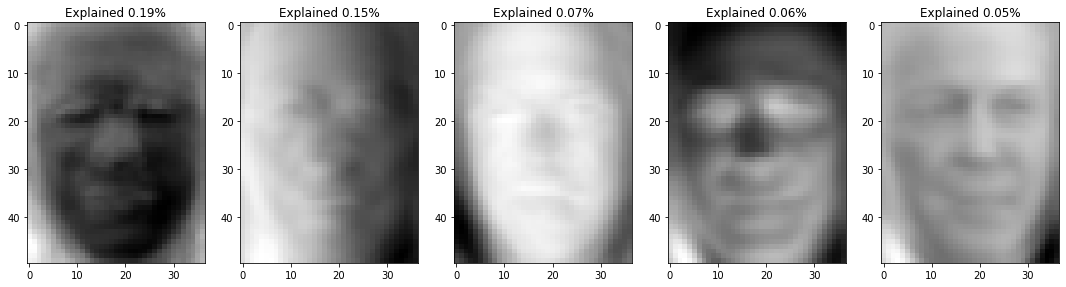

In [ ]:
fig, ax = plt.subplots(ncols=len(eivec), figsize=(3.7*(len(eivec)), 5))
for i in range(len(eivec)):
  v = eivec[i]
  ratio = pca.explained_variance_ratio_[i]
  ax[i].set_title(f'Explained {ratio:.2f}%')
  ax[i].imshow(v.reshape(50, 37), cmap='gray')